In [1]:
library("twitteR")
consumer_key <- 'nBjhmVqSwZtHkZApxtOBNjTg4'
consumer_secret <-'JoF6O12DkUzMgcB3DVjC9jGYMnOAnbh3YD2dcppmAE8rKmrmAd'
access_token <- '1246572168-rJD29rihXLy0NyCIjWuinYBwIErjnWlVSS1xVcw'
access_secret <- 'O8VXNztaKZ67aw7EhdS90aHg9tu2mF8jHkd0Q4IBgn9YS'
setup_twitter_oauth(consumer_key, consumer_secret, access_token, access_secret)

[1] "Using direct authentication"


In [4]:
#-----------------------------------------------------------------------------------------------------------
#Problem 2 (Study response to an event)
#-----------------------------------------------------------------------------------------------------------
query <- "#SuperBowl"                 #query term to be entered using the variable query   
result <- searchTwitter(query, n=5000)     
frame1 <- twListToDF(result)
users <- lookupUsers(frame1$screenName)
frame2 <- twListToDF(users)

1. Query term to be entered using the variable 'query'

In [8]:
write.table(frame2, "Locations1.csv", sep=",")  
write.table(frame1, "Text1.csv", sep=",")  

1. Store all the locations retreived in a csv file (Locations1.csv)
2. Store all the tweets retreived in a csv file (Text1.csv)
3. The locations of 5000 retreived tweets have been stored in Locations1.csv and the text has been stored in Text1.csv. Locations1.csv can be used to plot points on the map.
4. The 20000 retreived tweets have been stored in MainDB

In [5]:
MyData <- read.csv(file="Locations1.csv", header=TRUE, sep=",",row.names=NULL, fileEncoding="latin1")  #Retreived tweets stored in the CSV file in a dataframe MyData
head(MyData)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”

row.names,description,statusesCount,followersCount,favoritesCount,friendsCount,url,name,created,protected,verified,screenName,location,lang,id,listedCount,followRequestSent,profileImageUrl
princess_bakry,,243,21,731,20,NA,Mariam Bakry,2014-05-30 12:08:57,FALSE,FALSE,princess_bakry,,en,2534957629,2,FALSE,http://pbs.twimg.com/profile_images/733386464311005185/czh99_t5_normal.jpg
xqsXPi1wDefg456,,239,5,261,61,NA,Michelle Welch,2017-01-27 10:36:41,FALSE,FALSE,xqsXPi1wDefg456,,ru,824929112443740160,0,FALSE,http://pbs.twimg.com/profile_images/829289955130228737/tqYx3e_u_normal.jpg
relevantspur,"A freedom loving American! 110% Trump! Deplorable, humbled & thankful. God is good.",5599,444,28,828,NA,RelevantSpur í ¼í·ºí ¼í·¸,2016-11-10 03:21:38,FALSE,FALSE,relevantspur,,en,796553375282319360,48,FALSE,http://pbs.twimg.com/profile_images/811400696180281345/DrxFFanr_normal.jpg
bKQNO6hUDJoomaX,,434,22,408,112,NA,ÐÐ½Ð°ÑÑÐ°ÑÐ¸Ñ ÐÐ°ÐºÐµÐµÐ²Ð°,2017-01-24 11:45:24,FALSE,FALSE,bKQNO6hUDJoomaX,,ru,823859243279380485,1,FALSE,http://pbs.twimg.com/profile_images/824659439957450752/q_q3aG1M_normal.jpg
KvCM0GpNVoS73H2,,248,4,220,54,NA,Ava Churchill,2017-01-27 16:52:45,FALSE,FALSE,KvCM0GpNVoS73H2,,ru,825023753524424705,0,FALSE,http://pbs.twimg.com/profile_images/829277165996875777/Xjgn8Tse_normal.jpg
egorjtpanov,,556,23,495,152,NA,ÐÐ¸Ð·Ð° ÐÐ»ÐµÐºÑÐ°Ð½Ð´ÑÐ¾Ð²Ð½Ð°,2016-10-22 06:12:43,FALSE,FALSE,egorjtpanov,,ru,789711059414228993,3,FALSE,http://pbs.twimg.com/profile_images/822811609911459840/qVpydh2X_normal.jpg


1. Retreive the tweets stored in the CSV file (Locations1.cav) in a dataframe 'MyData'

In [6]:
library("ggmap")                                           
library(maps)
library("maptools")
finalLoc <- (table(MyData$location))                        
finalTable <- data.frame(Location=names(finalLoc),frequency=c(finalLoc))   
finalTable <- na.omit(cbind(finalTable, geocode(as.character(finalTable$Location))))  
finalTable

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20%20#Podcast%20&%20more.%20&sensor=false
Warning message:
“geocode failed with status ZERO_RESULTS, location = "  #Podcast & more. "”Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%20%20Adicto%20a%20la%20M%C3%83%C2%BAsica%20y%20ademas%20Hippie%20.%20Que%20mas%20Quieres%20?,10957,186,5841,270,NA,Mean%20Mr.%20Mustard,2013-02-10%2007:15:34,FALSE,FALSE,Emixl,En%20la%20vecindad%20del%20chavo%20del%208,es,1165188409,2,FALSE,http://pbs.twimg.com/profile_images/555636267925266432/G5sffk84_normal.jpeg%0AArtemiVidoni,A%20critical%20wit%20behind%20a%20sharp%20feather%20%C3%A2%C2%9C%C2%92%20#FaithIsAMentalDisorder%20#Atheism%20#ReligionIsTheProblem%20#ThinkFree,1464,2686,218,2169,https://t.co/TzRZAS976H,Artemi%20Vidoni,2015-06-25%2012:13:41,FALSE,FALSE,ArtemiVidoni,Vancouver&sensor=false
Warning message in readLines(connect, warn = FALSE):
“cannot open URL 'http://maps.googleapis.com/

,Location,frequency,lon,lat
actor,actor,1,-85.755498,38.256382
and my cats,and my cats,1,-123.502026,48.853619
Ariana Grande,Ariana Grande,1,63.716681,53.200822
broadcast,broadcast,1,-122.317522,47.676245
brother,brother,1,-89.801602,35.214585
Catholic,Catholic,1,3.901064,7.445369
Dir. of Industry Relations,Dir. of Industry Relations,1,-122.418322,37.781000
"father & Opa.,33822,608,5177,676,NA,Harvey Sietsema,2012-11-25 18:21:53,FALSE,FALSE,HSiets,"",en,970516614,116,FALSE,http://abs.twimg.com/sticky/default_profile_images/default_profile_4_normal.png billytylerxxx,Porn & fetish talent","father & Opa.,33822,608,5177,676,NA,Harvey Sietsema,2012-11-25 18:21:53,FALSE,FALSE,HSiets,"",en,970516614,116,FALSE,http://abs.twimg.com/sticky/default_profile_images/default_profile_4_normal.png billytylerxxx,Porn & fetish talent",1,-94.148144,36.175075
Fighter Pilot,Fighter Pilot,1,-78.263565,38.876066
"Greenwich Village,NYC - Paris","Greenwich Village,NYC - Paris",1,-74.001786,40.729629


1. Reference: https://gist.github.com/jjkrol/5894869
2. 'finalLoc' contains the location of retreived tweets and the frequency associated with the location obtained through table() method
3. Created a data frame 'finalTable' from the table 'finalLoc'
4. Add the lat and lon coordinates of each location as a separate column to the existing data frame using cbind() method and then deleting rows where lat lon is NA using na.omit() method

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=29.763284,-95.363271&zoom=4&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Warning message:
“Removed 156 rows containing missing values (geom_point).”

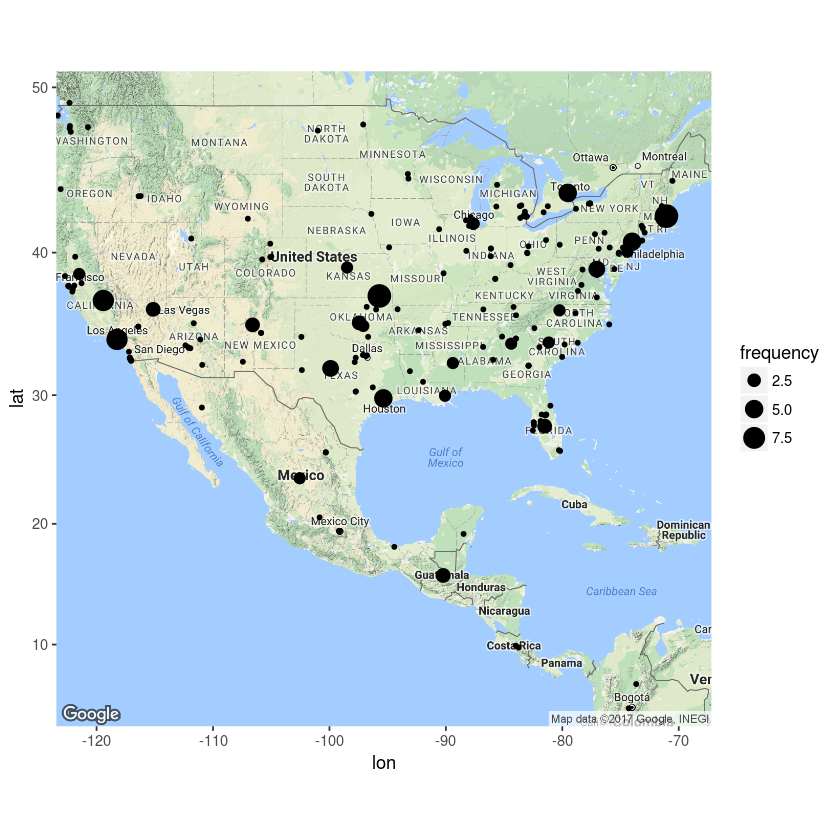

In [7]:
library("ggmap")                                           
library(maps)
library("maptools")
map1 = get_map(zoom=4, scale=2, source = "google", maptype="terrain")
finalMap = ggmap(map1)
finalMap = finalMap + geom_point(data = finalTable, aes(x = lon, y = lat,size=frequency)) 
finalMap

1. Plot the map using ggmap() method.
2. Here we have used geom_point() method to plot locations on the map along with the frequency of each plot.
3. The size of the blob will increase with the frequency.